In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Information

In [13]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# Dataset Visualisation

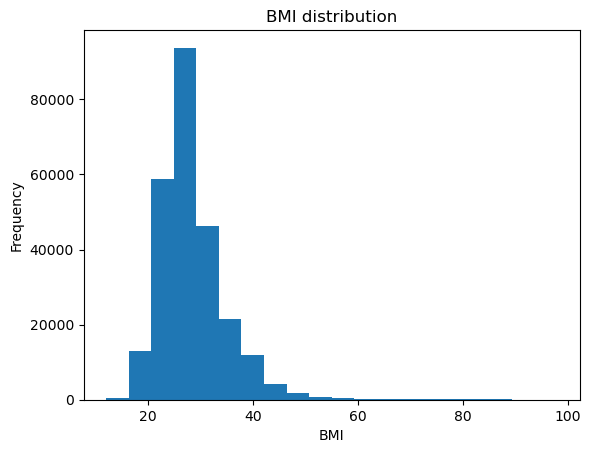

In [15]:
plot = df["BMI"].hist(bins=20)
plot.set_title('BMI distribution')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.show()

In [16]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

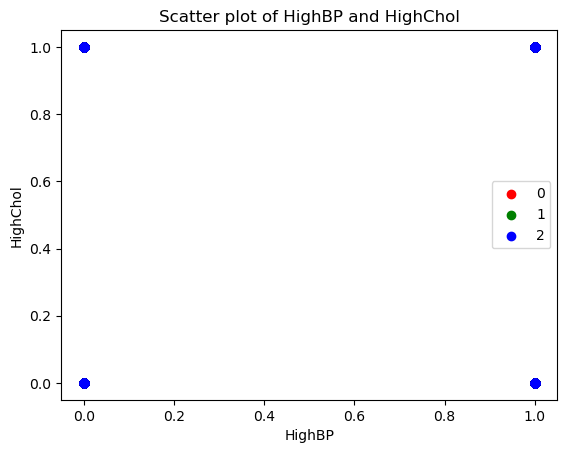

In [17]:
colors = ["red", "green", "blue"]

for i in range(3):
    x = df[df["Diabetes_012"] == i]
    plt.scatter(x["HighBP"], x["HighChol"], c=colors[i], label=i)

plt.xlabel("HighBP")
plt.ylabel("HighChol")
plt.title("Scatter plot of HighBP and HighChol")
plt.legend()
plt.show()

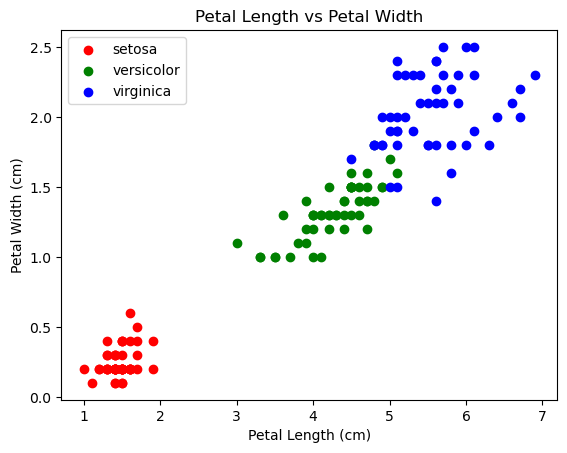

In [8]:
colors = ["red", "green", "blue"]
for i in range(3):
    x = df[df["species"] == data["target_names"][i]]
    plt.scatter(x["petal length (cm)"], x["petal width (cm)"], c=colors[i], label=data["target_names"][i])

plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Length vs Petal Width")
plt.legend()
plt.show()

In [9]:
corr = df.drop(columns=["species"]).corr() 
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


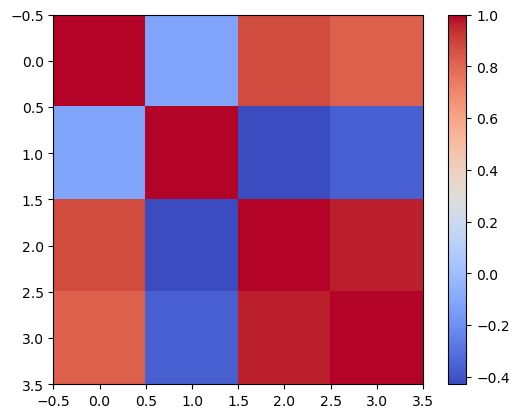

In [10]:
ax = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.show()

# Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["species"])
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [15]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
lr_model.score(X_test, y_test)

0.9777777777777777

## K-Nearest Neighbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier()

In [18]:
kn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
kn_model.score(X_test, y_test)

0.9777777777777777

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [21]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
dt_model.score(X_test, y_test)

0.9333333333333333

## Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [24]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
rf_model.score(X_test, y_test)

0.9555555555555556